# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Salma Elzeky

ID: 43-5917

Tutorial: T1

---

Name: Rawan Ibrahim

ID: 43-2692

Tutorial: T1

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [262]:
df.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [263]:
df.describe()

,SeniorCitizen,tenure
count,7032.000000,7032.000000
mean,0.162400,32.421786
std,0.368844,24.545260
min,0.000000,1.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [264]:
df['gender'] = df['gender'].astype('category').cat.codes 

In [265]:
df['PhoneService'] = df['PhoneService'].astype('category').cat.codes

In [266]:
df['MultipleLines'] = df['MultipleLines'].astype('category').cat.codes

In [267]:
df['InternetService'] = df['InternetService'].astype('category').cat.codes

In [268]:
df['StreamingTV'] = df['StreamingTV'].astype('category').cat.codes

In [269]:
df['StreamingMovies'] = df['StreamingMovies'].astype('category').cat.codes

In [270]:
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category').cat.codes

In [271]:
df['Churn'] = df['Churn'].astype('category').cat.codes

In [272]:
df.describe(include='object')

,customerID,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges
count,6976,7032,7032,7032,7032,7032,7032,7032,7032,7032,6180
unique,6976,2,2,3,3,3,3,3,4,1584,5783
top,9473-CBZOP,No,No,No,No,No,No,Month-to-month,Electronic check,$20.05/m,$19.65
freq,1,3639,4933,3497,3087,3094,3472,3875,2365,61,8


## Data Pre-processing

In [273]:
df.shape

(7032, 21)

In [274]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


In [275]:
df.count()      # Used to count the number of rows

customerID          6976
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        6180
Churn               7032
dtype: int64

In [276]:
print(df.isnull().sum())

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64


In [277]:
df.isnull().head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [278]:
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
7027    0
7028    0
7029    0
7030    0
7031    0
Length: 7032, dtype: int64

In [279]:
missing = df.isnull().sum(axis=1) > 0
missing

0       False
1       False
2       False
3       False
4       False
        ...  
7027    False
7028    False
7029    False
7030    False
7031    False
Length: 7032, dtype: bool

In [280]:
df[missing]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
17,9959-WOFKT,1,0,No,Yes,71,1,2,1,Yes,No,Yes,No,2,2,Two year,0,Bank transfer (automatic),$106.7/m,NaN,0
19,4183-MYFRB,0,0,No,No,21,1,0,1,No,Yes,Yes,No,0,2,Month-to-month,1,Electronic check,$90.05/m,NaN,0
23,3638-WEABW,0,0,Yes,No,58,1,2,0,No,Yes,No,Yes,0,0,Two year,1,Credit card (automatic),$59.9/m,NaN,0
31,4929-XIHVW,1,1,Yes,No,2,1,0,1,No,No,Yes,No,2,2,Month-to-month,1,Credit card (automatic),$95.5/m,NaN,0
37,6572-ADKRS,0,0,No,No,46,1,0,1,No,No,Yes,No,0,0,Month-to-month,1,Credit card (automatic),$74.8/m,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,4807-IZYOZ,0,0,No,No,51,1,0,2,No internet service,No internet service,No internet service,No internet service,1,1,Two year,0,Bank transfer (automatic),$20.65/m,NaN,0
7007,1122-JWTJW,1,0,Yes,Yes,1,1,0,1,No,No,No,No,0,0,Month-to-month,1,Mailed check,$70.65/m,NaN,1
7014,NaN,0,0,No,No,18,1,2,1,No,No,Yes,Yes,0,2,Month-to-month,1,Bank transfer (automatic),$95.05/m,NaN,0
7023,0639-TSIQW,0,0,No,No,67,1,2,1,Yes,Yes,Yes,No,2,0,Month-to-month,1,Credit card (automatic),$102.95/m,NaN,1


In [281]:
df['TotalCharges'].fillna(0, inplace=True)


In [282]:
df['customerID'].fillna("No customerID", inplace=True)


In [283]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [284]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.strip("$")
df['MonthlyCharges'] = df['MonthlyCharges'].str.strip("/m")
df['MonthlyCharges'].head()

0    29.85
1    56.95
2    53.85
3     42.3
4     70.7
Name: MonthlyCharges, dtype: object

In [285]:
df['TotalCharges'] = df['TotalCharges'].str.strip("$")
df['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [286]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype('float')
df['MonthlyCharges'].mean()

64.79820819112632

In [287]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].mean()

2281.9339320388385

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [288]:
corr=df.corr()
corr

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,0.005285,-0.007515,-0.006908,-0.002236,-0.005624,-0.008920,-0.011902,-0.013779,0.004788,-0.008545
SeniorCitizen,-0.001819,1.000000,0.015683,0.008392,0.146287,-0.032160,0.031019,0.047088,0.156258,0.219874,0.099249,0.150541
tenure,0.005285,0.015683,1.000000,0.007877,0.343673,-0.029835,0.290572,0.296785,0.004823,0.246862,0.827910,-0.354049
PhoneService,-0.007515,0.008392,0.007877,1.000000,-0.020504,0.387266,0.056393,0.043025,0.016696,0.248033,0.114186,0.011691
MultipleLines,-0.006908,0.146287,0.343673,-0.020504,1.000000,-0.108849,0.175403,0.181705,0.165306,0.433905,0.452000,0.038043
InternetService,-0.002236,-0.032160,-0.029835,0.387266,-0.108849,1.000000,0.108190,0.097967,-0.138166,-0.322173,-0.177582,-0.047097
StreamingTV,-0.005624,0.031019,0.290572,0.056393,0.175403,0.108190,1.000000,0.435354,0.097379,0.337156,0.395207,-0.036303
StreamingMovies,-0.008920,0.047088,0.296785,0.043025,0.181705,0.097967,0.435354,1.000000,0.083901,0.335761,0.399192,-0.038802
PaperlessBilling,-0.011902,0.156258,0.004823,0.016696,0.165306,-0.138166,0.097379,0.083901,1.000000,0.351930,0.157700,0.191454
MonthlyCharges,-0.013779,0.219874,0.246862,0.248033,0.433905,-0.322173,0.337156,0.335761,0.351930,1.000000,0.651407,0.192858


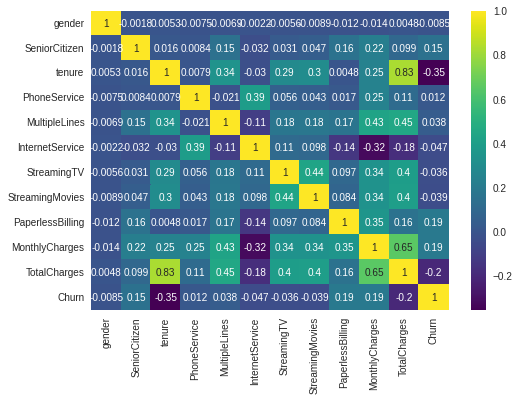

In [289]:
sns.heatmap(corr, cmap='viridis', annot=True)

**Answer for Q1**: Gender, SeniorCitizen, Tenure, PhoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies, and PaperlessBiling.

**Q2: Which payment method has the highest churn rate?**

**Visualization**

In [290]:
df_na_median = df.groupby('PaymentMethod').apply(lambda x: x.fillna(x.median()))
df_na_median

customerID  gender  ...  TotalCharges Churn
PaymentMethod                                       ...                    
Bank transfer (automatic) 3     7795-CFOCW       1  ...       1840.75     0
                          9     6388-TABGU       1  ...       3487.95     0
                          13    0280-XJGEX       1  ...       5036.30     1
                          17    9959-WOFKT       1  ...       2467.10     0
                          21    1680-VDCWW       1  ...        202.25     0
...                                    ...     ...  ...           ...   ...
Mailed check              7008  9710-NJERN       0  ...        826.00     0
                          7016  0550-DCXLH       1  ...        931.55     0
                          7019  0871-OPBXW       0  ...         39.25     0
                          7027  6840-RESVB       1  ...       1990.50     0
                          7030  8361-LTMKD       1  ...        306.60     1

[7032 rows x 21 columns]

In [291]:
automaticValues = df.loc[df.PaymentMethod=='Bank transfer (automatic)']

a=automaticValues['Churn']
a

3       0
9       0
13      1
17      0
21      0
       ..
7015    1
7017    0
7024    0
7026    0
7031    0
Name: Churn, Length: 1542, dtype: int8

In [292]:
MailValues = df.loc[df.PaymentMethod=='Mailed check']
MailValues['Churn']

1       0
2       1
7       0
10      0
16      0
       ..
7008    0
7016    0
7019    0
7027    0
7030    1
Name: Churn, Length: 1604, dtype: int8

In [293]:
ElecValues = df.loc[df.PaymentMethod=='Electronic check']
e=ElecValues['Churn']
e

0       0
4       1
5       1
8       1
14      0
       ..
7012    0
7018    0
7021    1
7025    0
7029    0
Name: Churn, Length: 2365, dtype: int8

In [294]:
CreditValues = df.loc[df.PaymentMethod=='Credit card (automatic)']
c=CreditValues['Churn']
c

6       0
11      0
12      0
15      0
18      1
       ..
7013    0
7020    0
7022    0
7023    1
7028    0
Name: Churn, Length: 1521, dtype: int8

**Answer for Q2**: BankTransfer(Automatic)

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

**Answer for Q3**: Your answer here

## Modelling

In [295]:
df3 = df.drop(['customerID', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod','TotalCharges'], axis=1)
df_encoded = pd.get_dummies(data=df3, drop_first=True, dtype="int8")


In [296]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


In [297]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

In [299]:
lr_model.fit(X_train, y_train)

knn_model.fit(X_train, y_train)

nb_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GaussianNB()

## Evaluation

In [300]:
lr_model.score(X_test, y_test)

0.7895734597156399

In [301]:
knn_model.score(X_test, y_test)

0.7691943127962085

In [302]:
nb_model.score(X_test, y_test)

0.7601895734597156

## Decision Tree Visualization

> Indented block



In [308]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [309]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph

## Bonus (Optional)